# Analysis of NetLogo PVI (pedestrian-vehicle interaction) model

This notebook does:
- Reads netlogo data (output) `log.csv`
- Clean data (we erase the first agents in the simulation, since very low number of initial pedestrian in the intersection skews the model. We then can set in the large-scale model a threshold of intersection crowdness based on number of agents and geometry of intersection. This is a topic for further research. For now, 50 pedestrians enter the simulation every 30 sec.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.matplotlib.style.use("seaborn")

# Read data from NetLogo

In [9]:
dfl = pd.read_csv('../utilities/20220125/log4dfree.csv', names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
dfl.shape

(47914, 10)

Lets try to earase first peds with `num-peds <= 49`.

In [11]:
dfl.drop(dfl[dfl["num-peds"]<=49].index,inplace=True)

In [13]:
dfl.head()

,id,start,end,vmax,num-peds,num-cars,num-cross,in,out,time
35,63,(patch 3 58),(patch 41 96),0.031140,50,8,0,3600,6039,20.325000
38,54,(patch 41 96),(patch 3 59),0.027264,50,8,0,3600,6368,23.066667
39,55,(patch 61 96),(patch 3 58),0.032695,50,8,1,3600,6485,24.041667
41,60,(patch 57 3),(patch 96 38),0.025816,50,8,0,3600,6590,24.916667
43,69,(patch 38 96),(patch 3 59),0.024540,50,8,0,3600,6627,25.225000


In [14]:
#164253 ticks /120 fps ~ 22.8 min
data = dfl.drop(['id','start','end','vmax','num-cross','in','out'],axis=1) 
# data['time']= data['time']/120
# data['vmax'] = data['vmax'].mean() * 0.5 * 120
# data.to_csv('./netlogo_output.csv')
data.head()

,num-peds,num-cars,time
35,50,8,20.325000
38,50,8,23.066667
39,50,8,24.041667
41,50,8,24.916667
43,50,8,25.225000


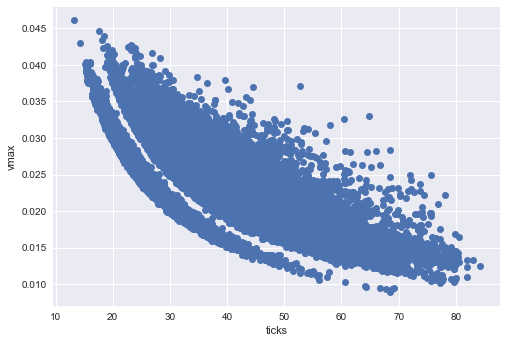

In [15]:
plt.plot(dfl["time"],dfl["vmax"],'o')
plt.xlabel("ticks")
plt.ylabel("vmax");

Text(0.5, 0, 'time')

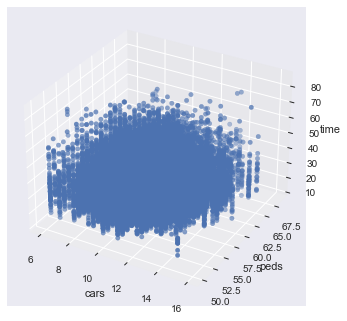

In [16]:
ax = plt.axes(projection='3d')
import numpy as np
x = dfl["num-cars"]
y = dfl["num-peds"]
z = dfl["time"]
ax.scatter(x,y,z)
ax.set_xlabel("cars")
ax.set_ylabel("peds")
ax.set_zlabel("time")

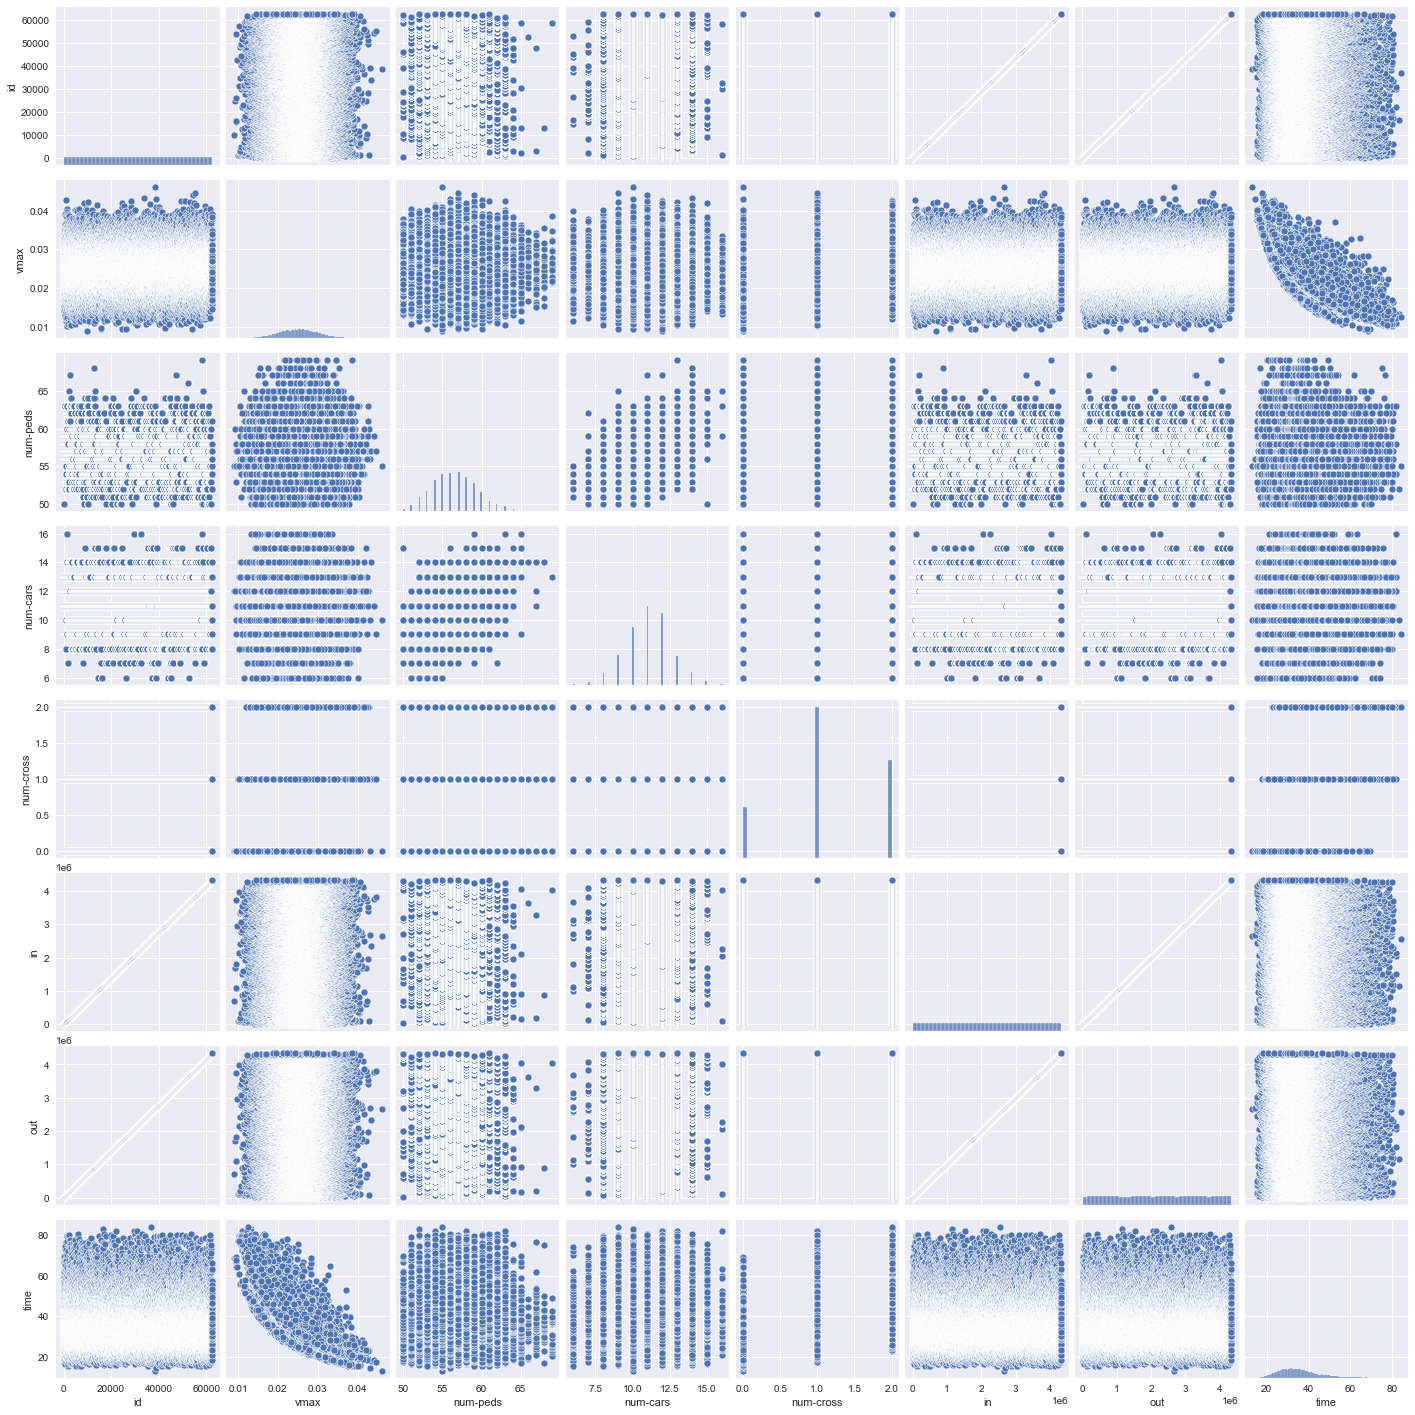

In [17]:
import seaborn as sns
sns.pairplot(dfl)

# Multiple Linear Regression

Based on [Web](https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/)

In [18]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [19]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [20]:
#import module
from sklearn.linear_model import LinearRegression
#create an objeect of LinearRegression class
LR = LinearRegression()
#fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [21]:
y_prediction = LR.predict(x_test)

In [22]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.8602489522705843
mean sqrd error is:14.252394656298414
root mean sqr err is:3.775234384286413


# Random Forest

r2_score is: 0.9910733511910833
mean sqrd error is:0.5337269511700904
root mean sqr err is:0.7305661853453733
r2_score is: 0.9472152414046322
mean sqrd error is:3.0958990194466085
root mean sqr err is:1.7595167005307475
r2_score is: 0.919897244677248
mean sqrd error is:4.513532679713136
root mean sqr err is:2.1245076323028673
r2_score is: 0.9186206188471617
mean sqrd error is:5.484175015735237
root mean sqr err is:2.3418315515286827
r2_score is: 0.8999543661460648
mean sqrd error is:10.159570837341203
root mean sqr err is:3.18740816924052


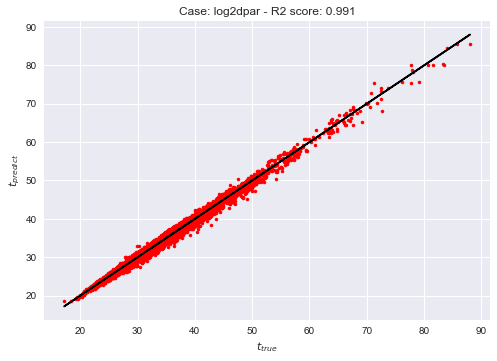

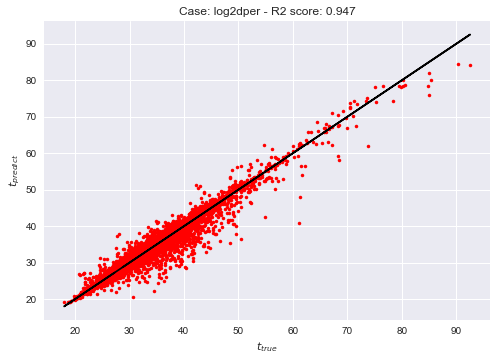

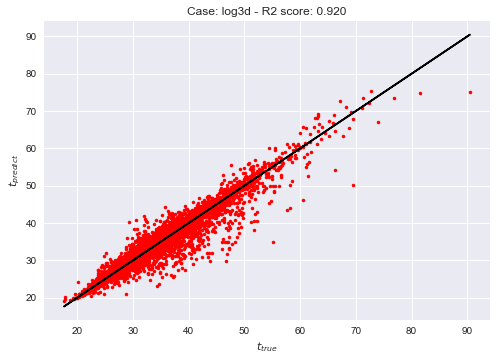

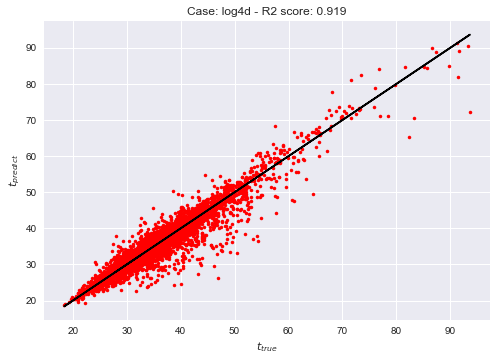

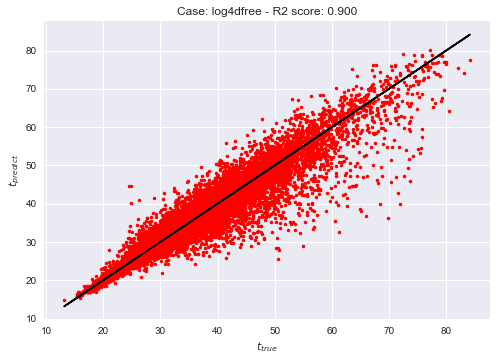

In [258]:
from sklearn.ensemble import RandomForestRegressor
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

files = ['log2dpar','log2dper','log3d','log4d','log4dfree']

for f in files:
    dfl = pd.read_csv(f'../utilities/20220125/{f}.csv', 
                      names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
    dfl.drop(dfl[dfl["num-peds"]<=49].index,inplace=True)
    dfl.drop_duplicates(inplace=True)
    #separate attributes from predicting attribute
    x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
    #separate the predicting attribute into Y for model training
    y = dfl['time']
    #import train_test_split from sklearn
    from sklearn.model_selection import train_test_split
    #split the data
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)
    clf = RandomForestRegressor()
    #train the model
    clf.fit(x_train,y_train)
    #predict the model
    y_prediction = clf.predict(x_test)
    #predicting the accuracy score
    score=r2_score(y_test,y_prediction)
    meansqerr = mean_squared_error(y_test,y_prediction)
    print(f'r2_score is: {score}')
    print(f'mean sqrd error is:{meansqerr}')
    print(f'root mean sqr err is:{np.sqrt(meansqerr)}')
    fig, axs = plt.subplots(1)
    axs.plot(y_test, y_prediction,'r.')
    axs.plot(y_test,y_test,'k-')
    axs.set_xlabel('$t_{true}$')
    axs.set_ylabel('$t_{predict}$')
    axs.set_title(f'Case: {f} - R2 score: {score:.3f}')
    print('='*10)

### RF one at a time

In [245]:
dfl = pd.read_csv('../utilities/20220125/log4dfree.csv', names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
dfl.shape

(47914, 10)

In [246]:
dfl.drop(dfl[dfl["num-peds"]<=49].index,inplace=True)
dfl.drop_duplicates(inplace=True)

In [252]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [253]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

In [254]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

#train the model
clf.fit(x_train,y_train)
#predict the model
y_prediction = clf.predict(x_test)

In [255]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.8997135489167499
mean sqrd error is:10.184025674657235
root mean sqr err is:3.191242026963363


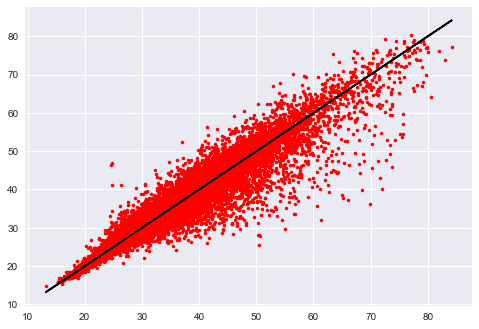

In [256]:
fig, axs = plt.subplots(1)
axs.plot(y_test, y_prediction,'r.')
axs.plot(y_test,y_test,'k-')

# Gaussian Process Regression (not working)

In [21]:
# #separate attributes from predicting attribute
# x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
# #separate the predicting attribute into Y for model training
# y = dfl['time']

In [22]:
# #import train_test_split from sklearn
# from sklearn.model_selection import train_test_split
# #split the data
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [23]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# from sklearn import preprocessing

# #create a GP model
# kernel = C(1.0,(1e-3,1e3))*RBF(1,(1e-2,1e2))
# gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=100,)

# #scale the data
# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train_scaled = scaler.transform(x_train)

# #fit the data
# gp.fit(x_train_scaled,y_train)

# #predict
# y_pred, sigma = gp.predict(x_test, return_std=True)

In [24]:
# #import r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# #score
# gp.score(x_train_scaled,y_train)
# #predicting the accuracy score
# score=r2_score(y_test,y_pred)
# meansqerr = mean_squared_error(y_test,y_pred)
# print(f'r2_score is: {score}')
# print(f'mean sqrd error is:{meansqerr}')
# print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

# Krigging (KPLS) with SMT library

In [215]:
dfl = pd.read_csv('../utilities/20220125/log4dfree.csv', names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
dfl.shape

(47914, 10)

In [216]:
dfl.drop(dfl[dfl["num-peds"]<=49].index,inplace=True)

In [217]:
dfl.shape

(47614, 10)

In [218]:
#separate attributes from predicting attribute
# x = dfl.drop(['id','start','end','vmax','in','out'],axis=1) 
x = dfl.drop(['id','start','end','in','out','vmax'],axis=1) 
xg = x.groupby(by=['num-cars','num-peds','num-cross']).mean()
# print(xg.shape)


In [219]:
x.drop_duplicates(inplace=True)

In [220]:
# need to use to_records since xg is a group df
x = xg.to_records(index=True)
x = pd.DataFrame(x).to_numpy()
y = x[:,-1]
x = x[:,:-1]
print(x.shape,y.shape)

(392, 3) (392,)


In [221]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

___________________________________________________________________________
   
                                   KPLS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 235
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.3480470
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 157
   
   Predicting ...
   Predicting - done. Time (sec):  0.0053449
   
   Prediction time/pt. (sec) :  0.0000340
   


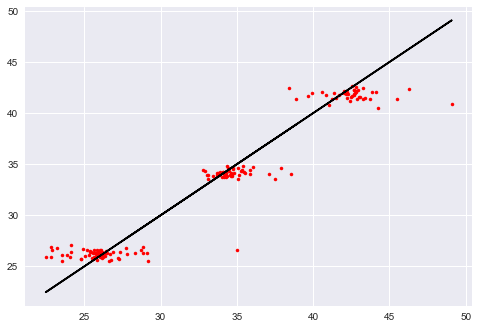

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KPLS

sm = KPLS(theta0=[1e-2])
sm.set_training_values(x_train,y_train)
sm.train()

y_prediction = sm.predict_values(x_test)

fig, axs = plt.subplots(1)
axs.plot(y_test, y_prediction,'r.')
axs.plot(y_test,y_test,'k-')

In [223]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.9331502114244914
mean sqrd error is:3.2143673567215036
root mean sqr err is:1.792865682844508


# Krigging with SMT library

In [150]:
dfl = pd.read_csv('../utilities/20220125/log4dfree.csv', names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
dfl.shape

(47914, 10)

In [151]:
#separate attributes from predicting attribute
# x = dfl.drop(['id','start','end','vmax','in','out'],axis=1) 
x = dfl.drop(['id','start','end','in','out','vmax'],axis=1) 
xg = x.groupby(by=['num-cars','num-peds','num-cross']).mean()
# print(xg.shape)


In [152]:
x.drop_duplicates(inplace=True)

In [153]:
# need to use to_records since xg is a group df
x = xg.to_records(index=True)
x = pd.DataFrame(x).to_numpy()
y = x[:,-1]
x = x[:,:-1]
print(x.shape,y.shape)

(424, 3) (424,)


In [154]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 254
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  1.3855591
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 170
   
   Predicting ...
   Predicting - done. Time (sec):  0.0053232
   
   Prediction time/pt. (sec) :  0.0000313
   


Text(0, 0.5, '$t_{predict}$')

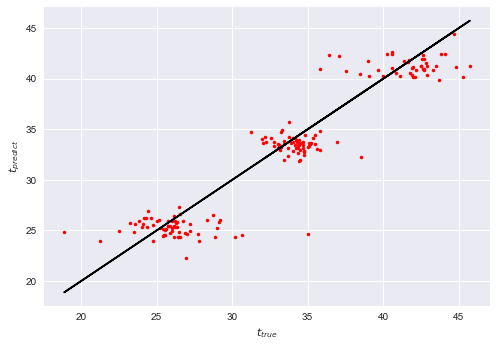

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

sm = KRG(theta0=[1e-2]*3)
sm.set_training_values(x_train,y_train)
sm.train()

y_prediction = sm.predict_values(x_test)

fig, axs = plt.subplots(1)
axs.plot(y_test, y_prediction,'r.')
axs.plot(y_test,y_test,'k-')
axs.set_xlabel('$t_{true}$')
axs.set_ylabel('$t_{predict}$')

In [158]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.8805134868700365
mean sqrd error is:5.041241082371127
root mean sqr err is:2.2452708260633343


# Data from paper

In [32]:
df = pd.read_csv('./data.csv')
df.head()

,id,x_obs,y_obs,x_est,y_est
0,1,2.57,38.10,2.57,38.10
1,1,2.78,37.39,2.78,37.39
2,1,2.95,36.69,2.95,36.69
3,1,3.11,35.97,3.11,35.97
4,1,3.27,35.22,3.27,35.22


In [33]:
def plot_data(num=1):
    fig, ax = plt.subplots(figsize=(2,10))
    for num in range(5):
        x = df[df['id']==num].x_obs
        y = df[df['id']==num].y_obs
        xe = df[df['id']==num].x_est
        ye = df[df['id']==num].y_est
        ax.plot(x,y,label=f'obs{num}')
        ax.plot(xe,ye,label=f'est{num}')
    plt.legend(loc='lower left',bbox_to_anchor=(1.04, 0),fancybox=True,shadow=True)

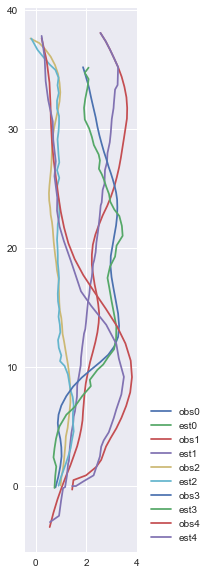

In [34]:
plot_data(5)